# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
#импортируем нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

In [2]:
#зададим переменные из условия задачи
BUDGET = 10 ** 10
POINTS = 500
BEST_POINTS = 200
PRICE_PER_BARREL = 450_000

In [3]:
#загрузим данные в разные датасеты
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')

In [4]:
print(geo_data_0.info())
print('Количество дубликатов:', geo_data_0.duplicated().sum())
print('Количество пропусков:','\n',geo_data_0.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
Количество дубликатов: 0
Количество пропусков: 
 id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


In [5]:
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')

In [6]:
print(geo_data_1.info())
print('Количество дубликатов:', geo_data_1.duplicated().sum())
print('Количество пропусков:','\n',geo_data_1.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
Количество дубликатов: 0
Количество пропусков: 
 id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


In [7]:
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [8]:
print(geo_data_2.info())
print('Количество дубликатов:', geo_data_2.duplicated().sum())
print('Количество пропусков:','\n',geo_data_2.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
Количество дубликатов: 0
Количество пропусков: 
 id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


В данных нет пропусков и дубликатов. Можно работать дальше.

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


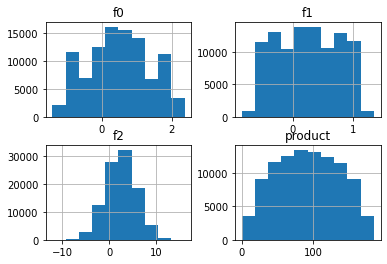

In [9]:
#посмотрим на общую информацию о данных
display(geo_data_0.describe())
geo_data_0.hist();

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


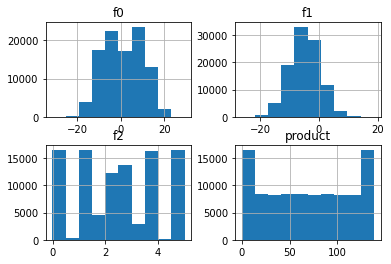

In [10]:
display(geo_data_1.describe())
geo_data_1.hist();

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


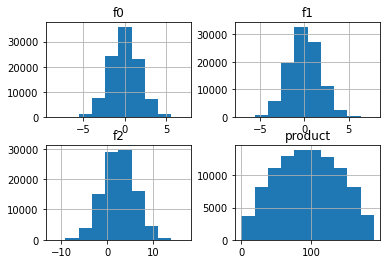

In [11]:
display(geo_data_2.describe())
geo_data_2.hist();

* id, вероятно, не важен для наших исследований
* f0, f1, f2 - это features для наших моделей
* product - target для нащих моделей

Если мы посмотрим на распределение признаков, то они различны для разных датасетов, поэтому одна модель не подойдёт. Нужно обучать 3 разных линейных модели.

In [12]:
print(geo_data_0['id'].duplicated().sum())
print(geo_data_1['id'].duplicated().sum())
print(geo_data_2['id'].duplicated().sum())

10
4
4


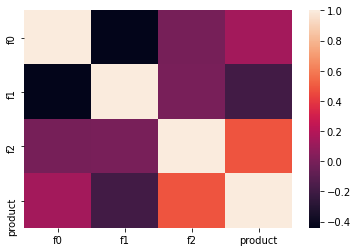

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(geo_data_0.corr());

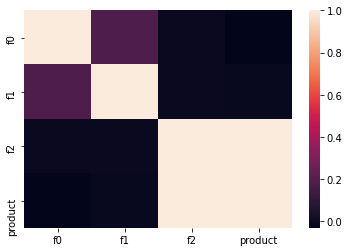

In [14]:
sns.heatmap(geo_data_1.corr());

In [1]:
sns.heatmap(geo_data_2.corr(annot = True));

NameError: name 'sns' is not defined

In [16]:
#избавимся от столбца id во всех 3 датасетах
geo_data_0 = geo_data_0.drop(['id'], axis=1)
geo_data_1 = geo_data_1.drop(['id'], axis=1)
geo_data_2 = geo_data_2.drop(['id'], axis=1)

## Обучение и проверка модели

In [17]:
def split_scale(data, target):
    '''
    На вход подаются датасет и название столбца target.
    Функция разделяет датасет на 2 набора: train и valid, 
    в соотношении 75:25,
    масштабирует их и обучает на них линейную модель.
    На выходе выдаёт предсказания, средний запас предсказанного сырья
    и RMSE модели.
    '''
    features = data.drop([target], axis=1)
    target = data[target]
    
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=12345)
    
    scaler = StandardScaler()
    scaler.fit(features_train)
    features_train = scaler.transform(features_train)
    features_valid = scaler.transform(features_valid)    
    
    model_lr = LinearRegression()
    model_lr.fit(features_train, target_train)
    predictions = model_lr.predict(features_valid)
    RMSE = (mean_squared_error(predictions, target_valid)) ** 0.5
    mean_product = sum(predictions) / len(predictions)
#    print('Done')
    
    return pd.Series(predictions, index=target_valid.index), target_valid, RMSE, mean_product

In [18]:
i=0
for ind in [geo_data_0, geo_data_1, geo_data_2]:
    predictions, target_valid, RMSE, mean_product = split_scale(ind, 'product')
    print(f'Регион {i}')
    i += 1
    print('RMSE:', RMSE)
    print('Средний запас предсказанного сырья:', mean_product)
    print('Средний запас сырья из данных:', ind['product'].mean())
    print('Полный запас предсказанного сырья:', predictions.sum())
    print()

Регион 0
RMSE: 37.5794217150813
Средний запас предсказанного сырья: 92.59256778438008
Средний запас сырья из данных: 92.50000000000001
Полный запас предсказанного сырья: 2314814.194609509

Регион 1
RMSE: 0.893099286775617
Средний запас предсказанного сырья: 68.7285468954458
Средний запас сырья из данных: 68.82500000000002
Полный запас предсказанного сырья: 1718213.67238615

Регион 2
RMSE: 40.02970873393434
Средний запас предсказанного сырья: 94.96504596800506
Средний запас сырья из данных: 95.00000000000004
Полный запас предсказанного сырья: 2374126.1492001223



In [19]:
#сохраним predictions, target_valid для каждого региона
predictions_0, target_0, RMSE_0, mean_product_0 = split_scale(geo_data_0, 'product')
predictions_1, target_1, RMSE_1, mean_product_1 = split_scale(geo_data_1, 'product')
predictions_2, target_2, RMSE_2, mean_product_2 = split_scale(geo_data_2, 'product')

Лучше всего модель предсказывет а _первом_ регионе, там значение средней квадратичной ошибки меньше остальных. Однако средний запас сырья в этом регионе меньше, чем в _нулевом_ и _втором_ регионах. Скорее всего, на данных первого региона произошло переобучение.

## Подготовка к расчёту прибыли

In [20]:
#среднее количество нефти на регион
mean_barrels = BUDGET / (PRICE_PER_BARREL)
print('Cреднее количество нефти на регион:', mean_barrels)

#средняя прибыль для лучших точек
mean_best_profit = BUDGET / BEST_POINTS
print('Cредняя прибыль для лучших точек:', mean_best_profit)

#среднее количество нефти для лучших точек
mean_barrels_per_point = mean_best_profit / (PRICE_PER_BARREL)
print('Cреднее количество нефти для лучших точек:', mean_barrels_per_point)

Cреднее количество нефти на регион: 22222.222222222223
Cредняя прибыль для лучших точек: 50000000.0
Cреднее количество нефти для лучших точек: 111.11111111111111


Средние запасы сырья в скважинах и предсказанные запасы меньше, чем среднее количество для лучших точек (111).

## Расчёт прибыли и рисков 

In [28]:
def oil_income(target, predictions, count):
    '''
    Функция для расчёта прибыли по выбранным скважинам 
    и предсказаниям модели
    '''
    predictions_sorted = predictions.sort_values(ascending=False)
    selected = target[predictions_sorted.index][:count]
    income = PRICE_PER_BARREL * selected.sum() - BUDGET
    return income

In [29]:
state = np.random.RandomState(12345)
def interval_loss(target, predictions):
    '''
    Функция для нахождения средней прибыли, 
    95%-го доверительного интервала и риска убытков
    '''
    income_tot=[]
    loss = 0
    for i in range(1000):
        target_sample = target.sample(n=POINTS, replace=True, random_state=state)
        predictions_sample = predictions[target_sample.index]
        profit = oil_income(target, predictions_sample, BEST_POINTS)
        if profit < 0:
            loss +=1
        income_tot.append(profit)
    
    income_tot = pd.Series(income_tot)
    lower = income_tot.quantile(0.025)
    upper = income_tot.quantile(0.975)
    mean_income = income_tot.mean()
    risk = loss / 1000
    return mean_income, lower, upper, risk

In [30]:
#посмотрим на распределение для нулевого региона
mean_income_0, lower_0, upper_0, risk_0 = interval_loss(target_0,predictions_0)
print('Доверительный 95% интервал:', (lower_0, upper_0))
print('Средний доход:', mean_income_0)
print('Риск:', risk_0)

Доверительный 95% интервал: (-111215545.89049526, 909766941.5534226)
Средний доход: 396164984.8023711
Риск: 0.069


In [31]:
#посмотрим на распределение для первого региона
mean_income_1, lower_1, upper_1, risk_1 = interval_loss(target_1,predictions_1)
print('Доверительный 95% интервал:', (lower_1, upper_1))
print('Средний доход:', mean_income_1)
print('Риск:', risk_1)

Доверительный 95% интервал: (78050810.7517417, 862952060.2637234)
Средний доход: 461155817.2772397
Риск: 0.007


In [32]:
#посмотрим на распределение для второго региона
mean_income_2, lower_2, upper_2, risk_2 = interval_loss(target_2,predictions_2)
print('Доверительный 95% интервал:', (lower_2, upper_2))
print('Средний доход:', mean_income_2)
print('Риск:', risk_2)

Доверительный 95% интервал: (-112227625.37857565, 934562914.5511636)
Средний доход: 392950475.17060447
Риск: 0.065


В ходе расчёта прибыли и рисков были найдены 95%-й доверительный интервал, средний доход и оценка риска. Так в нулевом и втором регионах вероятность убытков больше 2.5%, поэтому стоит заняться разработкой скважин в первом регионе.

## Вывод

В ходе нашего исследования были изучены данные о нефтяных скважинах в разных регионах. Была обучена модель линейной регрессии (как самая предсказуемая) для 3 регионов.

Также были написаны функция для вычисления прибыли в регионе и функция для нахождения доверительного интервала и рисков убытков. В результате исследования трёх регионов, был выявлен самый перспективный в плане разработки новых скважин. Только в первом регионе вероятность убытков меньше 2.5%, и это лучший показатель среди всех регионов.